In [2]:
#import libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [3]:
file1 = "/Users/ayadav/Downloads/ACME-HappinessSurvey2020.csv"

In [4]:
df = pd.read_csv(file1)

In [5]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [6]:
df.shape

(126, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [8]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [9]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
class_df = df.groupby('Y').count()
class_df.style.background_gradient(cmap='winter')

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,57,57,57,57,57,57
1,69,69,69,69,69,69


#  Data Visualization 

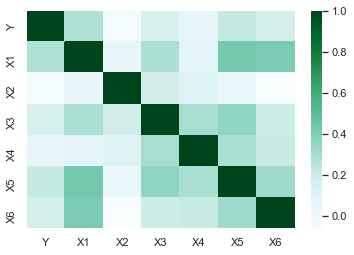

In [11]:
sns.heatmap(df.corr(), cmap='BuGn')

In [12]:
df2 = df.drop(columns='X2')

## Machine Learning

In [13]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = df2.drop(columns='Y')
targets = pd.DataFrame(df['Y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 5)
(26, 5)
(100, 1)
(26, 1)


## Pycaret Module

In [ ]:
#load the pycaret module
from pycaret.classification import *
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'Y',session_id=123)

In [ ]:
best_model = compare_models()

## XgBoost

In [ ]:
xgboost = create_model('xgboost', max_depth = 10)

## LightGBM

In [ ]:
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]

## Tune Model

In [ ]:
y = data_with_dummies["Purchased"]
x1 = data_with_dummies.drop(columns=["Purchased"], axis=1)

## Plot Model

In [ ]:
plot_model(tuned_knn, plot = 'pr')

In [ ]:
plot_model(tuned_knn, plot='confusion_matrix')

In [ ]:
predict_model(tuned_knn)

In [ ]:
final_knn = finalize_model(tuned_knn)

In [ ]:
unseen_predictions = predict_model(final_knn, data=df)
unseen_predictions.head()

In [15]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [17]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.5700


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.

In [18]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.5800


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.7/site-packages

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x1_scaled = scaler.fit_transform(features)

In [21]:
x1_scaled

array([[0.5 , 0.5 , 0.75, 0.25, 0.75],
       [0.5 , 0.5 , 1.  , 0.75, 0.5 ],
       [1.  , 0.5 , 0.5 , 0.5 , 1.  ],
       [1.  , 0.5 , 0.5 , 0.5 , 1.  ],
       [1.  , 0.5 , 0.5 , 0.5 , 1.  ],
       [1.  , 0.5 , 1.  , 1.  , 1.  ],
       [0.5 , 0.25, 0.25, 0.  , 0.5 ],
       [1.  , 0.75, 0.75, 0.75, 1.  ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [0.75, 0.75, 0.25, 1.  , 1.  ],
       [0.5 , 0.5 , 0.5 , 0.25, 0.5 ],
       [0.75, 0.5 , 0.75, 0.75, 0.75],
       [1.  , 0.75, 1.  , 1.  , 1.  ],
       [0.75, 0.75, 1.  , 0.75, 0.5 ],
       [0.75, 0.5 , 0.5 , 0.75, 0.5 ],
       [0.5 , 0.75, 0.5 , 0.75, 0.75],
       [1.  , 0.75, 1.  , 0.75, 1.  ],
       [1.  , 0.75, 0.5 , 0.75, 1.  ],
       [1.  , 0.25, 0.75, 0.75, 1.  ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [0.75, 0.5 , 0.5 , 0.75, 0.75],
       [0.75, 1.  , 1.  , 1.  , 0.75],
       [0.75, 1.  , 1.  , 1.  , 0.75],
       [1.  , 0.25, 1.  , 0.25, 0.75],
       [0.75, 0.5 , 0.5 , 0.5 , 0.75],
       [0.5 , 0.5 , 0.5 ,

In [23]:
x = sm.add_constant(x1_scaled)
reg_log = sm.Logit(targets,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.639003
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                 0.07203
Time:                        00:24:18   Log-Likelihood:                -80.514
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                   0.02855
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7853      1.107     -2.515      0.012      -4.956      -0.615
x1             2.2611      1.154      1.960      0.050       0.000       4.522
x2             0.4536      0.828      0.548      0.584      -1.169       2.077
x3            -0.0603      0.943     -0.064      0.949      -1.909       1.789
x4             0.8316      0.775      1.073      0.283      -0.688       2.351
x5             0.3992      1.051      0.380      0.704      -1.661       2.460
==============================================================================
"""

In [24]:
pred_corr = results_log.pred_table()[0, 0] + results_log.pred_table()[1, 1]
pred_incorr = results_log.pred_table()[0, 1] + results_log.pred_table()[1, 0]
total = results_log.pred_table().sum()

accuracy = pred_corr/total*100
print("Accuracy of the model is %.2f" %(accuracy) + '%')

Accuracy of the model is 60.32%


In [45]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


In [46]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 69.23
Time consumed for training: 0.046
Time consumed for prediction: 0.00120 seconds


In [61]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 65.38
Time consumed for training: 0.019 seconds
Time consumed for prediction: 0.00355 seconds


In [69]:
sdss_df_fe = df


# Principal Component Analysis
pca = PCA(n_components=2)
ugriz = pca.fit_transform(sdss_df_fe[['X2', 'Y']])

# update dataframe 
sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)), axis=1)
sdss_df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
sdss_df_fe.drop(['X2', 'Y'], axis=1, inplace=True)
sdss_df_fe.head()

,X1,X3,X4,X5,X6,PCA_1,PCA_2
0,3,3,4,2,4,0.475665,0.541195
1,3,3,5,4,3,-0.524243,0.554806
2,5,3,3,3,5,0.462053,-0.458713
3,5,3,3,3,5,1.475572,0.527583
4,5,3,3,3,5,1.475572,0.527583
